- Linda Türkmen
- 03/03/2022


In [1]:
import pandas as pd
import numpy as np
import math


In [3]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
0,0,NaN,PG,No,881.0,NaN,CLE,Driving Layup,2,NYK,...,0:20,2016-10-25,Derrick Rose,NaN,1,SCORED,OPP,CLE_NYK,2.0,0.0
1,1,NaN,PF,Yes,87.0,SCORED,CLE,Hook Shot,2,NYK,...,0:34,2016-10-25,Kevin Love,NaN,1,MISSED,CLE,CLE_NYK,0.0,-2.0
2,2,SCORED,SF,No,760.0,MISSED,CLE,Jump Shot,2,NYK,...,0:44,2016-10-25,Carmelo Anthony,24.0,1,MISSED,OPP,CLE_NYK,0.0,-2.0
3,3,MISSED,PF,No,890.0,MISSED,CLE,Tip Layup Shot,2,NYK,...,0:45,2016-10-25,Kristaps Porzingis,1.0,1,SCORED,OPP,CLE_NYK,2.0,-2.0
4,4,SCORED,SF,Yes,52.0,MISSED,CLE,Running Dunk,2,NYK,...,10:05,2016-10-25,Richard Jefferson,21.0,1,SCORED,CLE,CLE_NYK,2.0,-4.0


# 1) Sadece Lebron James'in şutlarını gösteren bir dataframe oluşturun.

In [4]:
shoot_player= dataset.loc[dataset["shoot player"] == "LeBron James"]
shoot_player

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
10,10,MISSED,SF,Yes,131.0,SCORED,CLE,Jump Shot,2,NYK,...,1:01,2016-10-25,LeBron James,27.0,1,SCORED,CLE,CLE_NYK,2.0,1.0
17,17,MISSED,SF,Yes,236.0,MISSED,CLE,Jump Shot,3,NYK,...,2:33,2016-10-25,LeBron James,6.0,1,MISSED,CLE,CLE_NYK,0.0,5.0
23,23,BLOCKED,SF,Yes,264.0,SCORED,CLE,Jump Shot,3,NYK,...,3:44,2016-10-25,LeBron James,42.0,1,MISSED,CLE,CLE_NYK,0.0,3.0
33,33,SCORED,SF,Yes,50.0,MISSED,CLE,Running Layup,2,NYK,...,6:04,2016-10-25,LeBron James,17.0,1,SCORED,CLE,CLE_NYK,2.0,7.0
44,44,MISSED,SF,Yes,52.0,SCORED,CLE,Putback Dunk,2,NYK,...,8:23,2016-10-25,LeBron James,4.0,1,SCORED,CLE,CLE_NYK,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,13159,MISSED,SF,No,51.0,SCORED,ATL,Driving Layup,2,CLE,...,1:16,2017-04-09,LeBron James,47.0,4,MISSED,CLE,ATL_CLE,0.0,17.0
13167,13167,SCORED,SF,No,58.0,SCORED,ATL,Driving Layup,2,CLE,...,3:36,2017-04-09,LeBron James,58.0,4,SCORED,CLE,ATL_CLE,2.0,15.0
13174,13174,SCORED,SF,No,52.0,MISSED,ATL,Driving Dunk,2,CLE,...,5:54,2017-04-09,LeBron James,29.0,4,SCORED,CLE,ATL_CLE,2.0,14.0
13182,13182,SCORED,SF,No,77.0,SCORED,ATL,Fadeaway Jumper,2,CLE,...,8:54,2017-04-09,LeBron James,31.0,4,MISSED,CLE,ATL_CLE,0.0,14.0


# 2) Verilerimizin içerisinde her sütün için kaç tane dolu veri var, percentile'ları kaç, ortalama değerleri kaç gibi değişkenleri gösteren kodu yazınız. Bütün kolonların isimlerini yazdırın.

- Çözüm yöntemi 1: hazır describe() fonksiyonunu kullanmak

In [5]:
dataset.describe()

,Unnamed: 0,location x,points,location y,time from last shot,quarter,points_gained,difference
count,13551.000000,13541.000000,13551.000000,13541.000000,12911.000000,13551.000000,13551.000000,13551.000000
mean,6775.000000,466.775275,2.362851,246.795436,32.890636,2.478489,1.065604,1.471847
std,3911.981084,348.506178,0.480840,121.989018,19.269357,1.148060,1.183611,11.403835
min,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,-45.000000
25%,3387.500000,92.000000,2.000000,172.000000,22.000000,1.000000,0.000000,-5.000000
50%,6775.000000,313.000000,2.000000,250.000000,31.000000,2.000000,0.000000,1.000000
75%,10162.500000,848.000000,3.000000,316.000000,40.000000,3.000000,2.000000,8.000000
max,13550.000000,933.000000,3.000000,500.000000,196.000000,6.000000,3.000000,34.000000


- Çözüm yöntemi 2: Tek tek hesaplamak 

In [6]:
#Numpy ve pandas kütüphaneleri bir arada kullanarak da yine aynı şekilde 5li özet istatiski bilgilerine eriştim

min1 = np.min(dataset)
max1 = np.max(dataset)
q1 = dataset.quantile(.25)
q2 = dataset.quantile(.5)  
q3 = dataset.quantile(.75) 

print("min: \n{}\n".format(min1))   #min
print("q1 : \n{}\n".format(q1))     #quantile1
print("q2 : \n{}\n".format(q2))     #quantile2 #Median
print("q3 : \n{}\n".format(q3))     #quantile3    
print("max: \n{}\n".format(max1) )  #max

min: 
Unnamed: 0                           0
player position                      C
home game                           No
location x                         5.0
home team                          ATL
shot type               Alley Oop Dunk
points                               2
away team                          ATL
location y                         0.0
time                              0:03
date                        2016-10-25
shoot player              A.J. Hammons
time from last shot                0.0
quarter                              1
current shot outcome           BLOCKED
My_Team                            CLE
HomeAway                       ATL_CLE
points_gained                      0.0
difference                       -45.0
dtype: object

q1 : 
Unnamed: 0             3387.5
location x               92.0
points                    2.0
location y              172.0
time from last shot      22.0
quarter                   1.0
points_gained             0.0
difference            

C:\Users\Linda7lll\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


# 3) Sonrasında açılan notebook'tan verileri okutun. İlk 5 entry'sini yazdırın. Gözünüze çarpan şeyleri comment olarak ekleyin.

In [7]:
dataset.head() #head modulu default olarak 5 değerini almaktadır

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
0,0,NaN,PG,No,881.0,NaN,CLE,Driving Layup,2,NYK,...,0:20,2016-10-25,Derrick Rose,NaN,1,SCORED,OPP,CLE_NYK,2.0,0.0
1,1,NaN,PF,Yes,87.0,SCORED,CLE,Hook Shot,2,NYK,...,0:34,2016-10-25,Kevin Love,NaN,1,MISSED,CLE,CLE_NYK,0.0,-2.0
2,2,SCORED,SF,No,760.0,MISSED,CLE,Jump Shot,2,NYK,...,0:44,2016-10-25,Carmelo Anthony,24.0,1,MISSED,OPP,CLE_NYK,0.0,-2.0
3,3,MISSED,PF,No,890.0,MISSED,CLE,Tip Layup Shot,2,NYK,...,0:45,2016-10-25,Kristaps Porzingis,1.0,1,SCORED,OPP,CLE_NYK,2.0,-2.0
4,4,SCORED,SF,Yes,52.0,MISSED,CLE,Running Dunk,2,NYK,...,10:05,2016-10-25,Richard Jefferson,21.0,1,SCORED,CLE,CLE_NYK,2.0,-4.0


# 4) Kaç sütun ve kaç satır içerdiğini yazdırın.

In [8]:
#satır sayısı
rows = len(dataset)
print("Satır Sayısı", rows)

#sütun sayısı
columns = len(dataset.columns)
print("Sütun Sayısı:", columns)

Satır Sayısı 13551
Sütun Sayısı: 21


# 5) Değişken tiplerimiz neler? (Float,int,str) gibi, bunları yazdırın.

In [9]:
pd.DataFrame(data=dataset.dtypes, columns=["types"])

,types
Unnamed: 0,int64
self previous shot,object
player position,object
home game,object
location x,float64
opponent previous shot,object
home team,object
shot type,object
points,int64
away team,object


# 6) Cleveland takımında en yüksek yüzdeyle şut atan oyuncu kimdir? Bunu bulurken, bütün şutları değerlendirin, serbest atış, 2 sayılık atış ve 3 sayılık atış olması önemli değil. Bu değer kaçtır?


In [10]:
player_l  = dataset.loc[dataset["My_Team"] == "CLE", ["points", "shoot player"]].groupby("shoot player").count()
player_ll = player_l.idxmax().rename({"points":"shoot player"})
print("{}\n".format(player_ll))

count_l  = dataset.loc[dataset["My_Team"] == "CLE", ["points", "shoot player"]].groupby("shoot player").count()
count_ll = count_l.max().rename({"points":"count"})
print(count_ll)

shoot player    Kyrie Irving
dtype: object

count    1349
dtype: int64


# 7) Cleveland takımındaki her oyuncunun attığı toplam şut sayısını bulunuz.


In [11]:
Cleveland_shoots_l = dataset.loc[dataset["My_Team"] == "CLE", ["points", "shoot player"]].groupby("shoot player").count()
Cleveland_shoots_l

,points
shoot player,
Channing Frye,500
Chris Andersen,17
DeAndre Liggins,130
Deron Williams,140
Derrick Williams,95
Iman Shumpert,453
J.R. Smith,335
James Jones,95
Jordan McRae,141


# 8) Lebron James'in attığı şutların içerisinde maksimum x değerine sahip entry'nin indexini bulunuz.

In [12]:
max_x = shoot_player["location x"].max() #shoot_player datafram'ı 1.soruda oluşturulmuştur
index = shoot_player["location x"].idxmax()
print("maksimum x : {}, index: {}".format(max_x, index))

maksimum x : 910.0, index: 12407


# 9) Bir fonksiyon tanımlayın. Buradaki amaç location y, ve location x verilerini fonksiyona verdiğinizde, şutun atıldığı noktanın potaya kuşbakışı uzaklığını(feet) buldurmaktır. Bu uzaklıkları 0-10,10-20,20-30, 30+ olacak şekilde, yakın, orta, uzak ve orta sahadan gibi isimlerle sınıflandırın. Bu sınıflandırmayı verinize yeni bir sütun(feature) olarak ekleyin.

Arkadaşlar 9. soruda anlaşılmayan şeyler olduğunu fark ettim. 
- Öncelikle, basketbol sahasının boy ve eninin ne olduğuna bakın. 
- Sonra verilerinizde 'location y' enin aldığı maksimum ve minimum y değerlerine bakın.
- Buradan bir derecelik farkın kaç feet olduğunu bulun.
- Buna bağlı olarak minimum ve maksimum x değerlerinin ne olması gerektiğini bulun. 
- Potaların lokasyonunu belirleyin. (Potaların lokasyon x'i ve lokasyon y'si nedir?)
- en sonunda x ve y düzleminde, iki noktanın arasındaki mesafeyi nasıl bulabileceğinizi düşünün.
- Yeterince vaktiniz var, yazdıklarımı iyice düşünerek buna yanıt bulabileceğinize inanıyorum.
Kolay gelsin.

In [13]:
# kısa kenardan cemberin ortasına uzaklığı = 6.3 feet = 63 inch
# tum sahanin uzunlugu = 94 feet = 940 inch,  uzunluk/2 = yarisi 47 feet = 470 inch)
# sahanın genişiliği = 50 feet = 500 inch, genişilk/2 =  25 feet = 250 inch
dataset_9 = dataset.copy()

for index in range(0,len(dataset_9)):
     
    X = 0 # x uzaklığı
    if dataset_9.loc[index, "location x"] < 470:
        X = dataset_9.loc[index, "location x"] - 63
    else:
        X = 940 - 63 - dataset_9.loc[index, "location x"]
        
    Y = 0 # y uzaklığı    
    Y = math.fabs(dataset_9.loc[index, "location y"] - 250)
    
    mesafe_col = math.sqrt(X**2 + Y**2) / 10
    
    
    
    
   # Bu uzaklıkları 0-10,10-20,20-30, 30+ olacak şekilde, yakın, orta, uzak ve orta sahadan
    uzaklik_tipi = ""
    uzaklik = 0
    if (0 < mesafe_col <= 10):
        uzaklik_tipi = "Yakın"
        uzaklik = mesafe_col
        
    elif (10 < mesafe_col <= 20):
        uzaklik_tipi = "Orta"
        uzaklik = mesafe_col
        
    elif (20 < mesafe_col <= 30):
        uzaklik_tipi = "Uzak"
        uzaklik = mesafe_col
        
    else:
        uzaklik_tipi = "Orta Sahadan"
        uzaklik = mesafe_col
        
    #yerni bir sütun oluşturup sınıflandırdığım uzaklık türlerini bir sütun halinde gösterdim   
    dataset_9.loc[index, "Uzaklık Sınıf"] = uzaklik_tipi #uzaklık türü sütunu
    dataset_9.loc[index, "Uzaklık"] = uzaklik           #uzaklık sütunu

dataset_9.sample(7) #rastgele 7 satır bastırcaka

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference,Uzaklık Sınıf,Uzaklık
12063,12063,MISSED,F,Yes,876.0,MISSED,CHI,Pullup Jump Shot,2,CLE,...,Paul Zipser,21.0,3,SCORED,OPP,CHI_CLE,2.0,-1.0,Uzak,20.400245
9107,9107,MISSED,SF,No,881.0,SCORED,CLE,Tip Layup Shot,2,IND,...,Paul George,1.0,2,MISSED,OPP,CLE_IND,0.0,-4.0,Yakın,1.649242
10182,10182,SCORED,PG,Yes,846.0,SCORED,MIA,Driving Floating Jump Shot,2,CLE,...,Goran Dragic,26.0,3,SCORED,OPP,MIA_CLE,2.0,-18.0,Yakın,6.140033
6237,6237,SCORED,PF,Yes,133.0,SCORED,SAC,Jump Shot,2,CLE,...,Anthony Tolliver,78.0,1,MISSED,OPP,SAC_CLE,0.0,1.0,Yakın,7.502666
4057,4057,MISSED,SG,No,735.0,MISSED,CLE,Jump Shot,3,LAL,...,Nick Young,75.0,2,SCORED,OPP,CLE_LAL,3.0,6.0,Uzak,26.860380
1176,1176,SCORED,PG,Yes,671.0,MISSED,CLE,Jump Shot,3,ATL,...,Kyrie Irving,37.0,3,MISSED,CLE,CLE_ATL,0.0,-5.0,Uzak,25.961510
274,274,SCORED,SG,Yes,655.0,MISSED,TOR,Jump Shot,3,CLE,...,DeMar DeRozan,52.0,3,MISSED,OPP,TOR_CLE,0.0,3.0,Uzak,25.094422


# 10) Şut tiplerini bir liste haline getirin ve verilerin tümünü kullanarak her şuttan ne kadar kullanıldığını bulun. Listeyi alfabe sırasında sıralayın ve listenin sonuna kendi isimlendirdiğiniz bir şutu ekleyin. Sonra eklediğiniz bu şutu silin. Bank shot içeren indexleri bir liste haline getirin.

In [25]:
# Şut tiplerini bir liste haline getirin ve verilerin tümünü kullanarak her şuttan ne kadar kullanıldığını bulun.
datasetCopy = dataset.copy()
shot_types = datasetCopy["shot type"].sort_values(ascending=True)

# Listeyi alfabe sırasında sıralayın 
shot_counts = shot_types.value_counts(sort=False)
shot_counts = shot_counts.to_frame()
shot_counts


,shot type
Alley Oop Dunk,89
Alley Oop Layup,56
Cutting Dunk Shot,188
Cutting Finger Roll Layup Shot,19
Cutting Layup Shot,279
Driving Bank Hook Shot,3
Driving Bank Shot,98
Driving Dunk,108
Driving Finger Roll Layup,134
Driving Floating Bank Jump Shot,42


In [26]:
#dataframe index eklendi
shot_counts.reset_index(inplace=True)
shot_counts.index.name = "index"

#datfarme de gerekli isim düzenlemeleri yapıldı
shot_counts.columns = shot_counts.columns.str.replace('shot type', 'Şut Sayısı')
shot_counts.columns = shot_counts.columns.str.replace('index', 'Şut Tipi')
shot_counts

,Şut Tipi,Şut Sayısı
index,,
0,Alley Oop Dunk,89
1,Alley Oop Layup,56
2,Cutting Dunk Shot,188
3,Cutting Finger Roll Layup Shot,19
4,Cutting Layup Shot,279
5,Driving Bank Hook Shot,3
6,Driving Bank Shot,98
7,Driving Dunk,108
8,Driving Finger Roll Layup,134


In [27]:
#listenin sonuna kendi isimlendirdiğiniz bir şutu ekleyin. # Sonra eklediğiniz bu şutu silin.
shot_counts.loc[(len(shot_counts))] = { "Şut Tipi":"my_shot", "Şut Sayısı": 77} #şut eklendi
shot_counts

,Şut Tipi,Şut Sayısı
index,,
0,Alley Oop Dunk,89
1,Alley Oop Layup,56
2,Cutting Dunk Shot,188
3,Cutting Finger Roll Layup Shot,19
4,Cutting Layup Shot,279
5,Driving Bank Hook Shot,3
6,Driving Bank Shot,98
7,Driving Dunk,108
8,Driving Finger Roll Layup,134


In [28]:
shot_counts.drop(len(shot_counts) - 1, inplace=True) #şut slindi
shot_counts

,Şut Tipi,Şut Sayısı
index,,
0,Alley Oop Dunk,89
1,Alley Oop Layup,56
2,Cutting Dunk Shot,188
3,Cutting Finger Roll Layup Shot,19
4,Cutting Layup Shot,279
5,Driving Bank Hook Shot,3
6,Driving Bank Shot,98
7,Driving Dunk,108
8,Driving Finger Roll Layup,134


In [29]:
#Bank shot içeren indexleri bir liste haline getirin.
shot_counts = shot_counts[shot_counts["Şut Tipi"].str.contains("Bank")]
shot_counts

,Şut Tipi,Şut Sayısı
index,,
5,Driving Bank Hook Shot,3
6,Driving Bank Shot,98
9,Driving Floating Bank Jump Shot,42
16,Fadeaway Bank Shot,13
20,Hook Bank Shot,5
22,Jump Bank Shot,145
25,Pullup Bank Shot,32
41,Step Back Bank Jump Shot,5
45,Turnaround Bank Hook Shot,6


# 11) Boş bir seri yaratın. Şut tiplerinden 'a' harfi içerenleri listede tutmak için bir kod yazın.

In [30]:
shot_a = shot_counts[shot_counts["Şut Tipi"].str.contains('a')]
series = pd.Series(shot_a["Şut Tipi"])
series

index
5                 Driving Bank Hook Shot
6                      Driving Bank Shot
9        Driving Floating Bank Jump Shot
16                    Fadeaway Bank Shot
20                        Hook Bank Shot
22                        Jump Bank Shot
25                      Pullup Bank Shot
41              Step Back Bank Jump Shot
45             Turnaround Bank Hook Shot
46                  Turnaround Bank Shot
48    Turnaround Fadeaway Bank Jump Shot
Name: Şut Tipi, dtype: object

# 12) Derste işlediğimiz, 'List comprehension' kullanarak, atılan tüm şutlardan kaç tanesinin y değerinin 250'den büyük olduğunu veren fonksiyonu yazın.
Örnek: def......

In [31]:
def ListComprehension(dataset, location):
    return [loc_y for loc_y in dataset[location] if (loc_y >= 250)]

ListComprehension(dataset, "location y")

[250.0,
 364.0,
 365.0,
 491.0,
 357.0,
 359.0,
 400.0,
 380.0,
 288.0,
 383.0,
 252.0,
 250.0,
 427.0,
 339.0,
 482.0,
 264.0,
 251.0,
 259.0,
 262.0,
 318.0,
 251.0,
 262.0,
 267.0,
 250.0,
 265.0,
 357.0,
 250.0,
 450.0,
 269.0,
 278.0,
 416.0,
 254.0,
 485.0,
 392.0,
 274.0,
 470.0,
 320.0,
 250.0,
 275.0,
 262.0,
 257.0,
 250.0,
 472.0,
 342.0,
 351.0,
 250.0,
 250.0,
 302.0,
 250.0,
 328.0,
 385.0,
 250.0,
 372.0,
 318.0,
 260.0,
 490.0,
 250.0,
 488.0,
 483.0,
 250.0,
 478.0,
 342.0,
 250.0,
 336.0,
 331.0,
 251.0,
 321.0,
 250.0,
 311.0,
 250.0,
 250.0,
 260.0,
 250.0,
 254.0,
 397.0,
 473.0,
 250.0,
 434.0,
 319.0,
 338.0,
 251.0,
 403.0,
 313.0,
 262.0,
 250.0,
 336.0,
 359.0,
 292.0,
 373.0,
 485.0,
 259.0,
 477.0,
 488.0,
 254.0,
 365.0,
 395.0,
 278.0,
 306.0,
 254.0,
 300.0,
 251.0,
 287.0,
 259.0,
 346.0,
 277.0,
 415.0,
 277.0,
 274.0,
 259.0,
 380.0,
 256.0,
 418.0,
 250.0,
 377.0,
 296.0,
 251.0,
 256.0,
 257.0,
 250.0,
 262.0,
 257.0,
 267.0,
 290.0,
 269.0,
 292.0,


# 13) Bir dictionary oluşturun. O dictionary'e verimizin quarter bilgisini gönderceğiz. O gönderdiğimiz sayıya göre ilk çeyrek, ikinci çeyrek, üçüncü çeyrek ve son çeyrek olarak değiştirsin.

In [32]:
#sadece ilk 4 çeyrek alındı ve yeni bir dataframe oluşturuldu

datasetCopyy = dataset.copy()
q1  = datasetCopyy[datasetCopyy['quarter']== 1 ]
q2  = datasetCopyy[datasetCopyy['quarter']== 2 ]
q3  = datasetCopyy[datasetCopyy['quarter']== 3 ]
q4  = datasetCopyy[datasetCopyy['quarter']== 4 ]

q = [q1, q2, q3, q4]
q_dataframe = pd.concat(q)
q_dataframe

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
0,0,NaN,PG,No,881.0,NaN,CLE,Driving Layup,2,NYK,...,0:20,2016-10-25,Derrick Rose,NaN,1,SCORED,OPP,CLE_NYK,2.0,0.0
1,1,NaN,PF,Yes,87.0,SCORED,CLE,Hook Shot,2,NYK,...,0:34,2016-10-25,Kevin Love,NaN,1,MISSED,CLE,CLE_NYK,0.0,-2.0
2,2,SCORED,SF,No,760.0,MISSED,CLE,Jump Shot,2,NYK,...,0:44,2016-10-25,Carmelo Anthony,24.0,1,MISSED,OPP,CLE_NYK,0.0,-2.0
3,3,MISSED,PF,No,890.0,MISSED,CLE,Tip Layup Shot,2,NYK,...,0:45,2016-10-25,Kristaps Porzingis,1.0,1,SCORED,OPP,CLE_NYK,2.0,-2.0
4,4,SCORED,SF,Yes,52.0,MISSED,CLE,Running Dunk,2,NYK,...,10:05,2016-10-25,Richard Jefferson,21.0,1,SCORED,CLE,CLE_NYK,2.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546,13546,MISSED,C,Yes,838.0,SCORED,CLE,Hook Shot,2,TOR,...,8:42,2017-04-12,Walter Tavares,76.0,4,MISSED,CLE,CLE_TOR,0.0,-22.0
13547,13547,SCORED,SF,No,87.0,MISSED,CLE,Jump Shot,2,TOR,...,8:52,2017-04-12,Bruno Caboclo,25.0,4,SCORED,OPP,CLE_TOR,2.0,-22.0
13548,13548,MISSED,SF,Yes,895.0,SCORED,CLE,Jump Shot,3,TOR,...,9:15,2017-04-12,James Jones,33.0,4,MISSED,CLE,CLE_TOR,0.0,-24.0
13549,13549,SCORED,C,No,298.0,MISSED,CLE,Jump Shot,3,TOR,...,9:33,2017-04-12,Lucas Nogueira,41.0,4,MISSED,OPP,CLE_TOR,0.0,-24.0


In [33]:
dictionary = q_dataframe["quarter"].to_dict()
dictionary

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 181: 1,
 182: 1,
 183: 1,
 184: 1,
 185: 1,
 186: 1,
 187: 1,
 188: 1,
 189: 1,
 190: 1,
 191: 1,
 192: 1,
 193: 1,
 194: 1,
 195: 1,
 196: 1,
 197: 1,
 198: 1,
 199: 1,
 200: 1,
 201: 1,
 202: 1,
 203: 1,
 204: 1,
 205: 1,
 206: 1,
 207: 1,
 208: 1,
 209: 1,
 210: 1,
 211: 1,
 212: 1,
 213: 1,
 214: 1,
 215: 1,
 216: 1,
 217: 1,
 218: 1,
 219: 1,
 220: 1,
 221: 1,
 222: 1,
 223: 1,
 224: 1,
 225: 1,
 226: 1,
 227: 1,
 228: 1,
 350: 1,
 351: 1,
 352: 1,
 353: 1,
 354: 1,
 355: 1,
 356: 1,
 357: 1,
 358: 1,
 359: 1,
 360: 1,
 361: 1,
 362: 1,
 363: 1,
 364: 1,
 365: 1,
 366: 1,
 367: 1,
 368: 1,

In [34]:
quarters = {1:"ilk çeyrek", 2:"ikinci çeyrek", 3:"üçüncü çeyrek", 4:"son çeyrek"}

for x, y in dictionary.items():
    dictionary[x] = quarters[y]

dictionary

{0: 'ilk çeyrek',
 1: 'ilk çeyrek',
 2: 'ilk çeyrek',
 3: 'ilk çeyrek',
 4: 'ilk çeyrek',
 5: 'ilk çeyrek',
 6: 'ilk çeyrek',
 7: 'ilk çeyrek',
 8: 'ilk çeyrek',
 9: 'ilk çeyrek',
 10: 'ilk çeyrek',
 11: 'ilk çeyrek',
 12: 'ilk çeyrek',
 13: 'ilk çeyrek',
 14: 'ilk çeyrek',
 15: 'ilk çeyrek',
 16: 'ilk çeyrek',
 17: 'ilk çeyrek',
 18: 'ilk çeyrek',
 19: 'ilk çeyrek',
 20: 'ilk çeyrek',
 21: 'ilk çeyrek',
 22: 'ilk çeyrek',
 23: 'ilk çeyrek',
 24: 'ilk çeyrek',
 25: 'ilk çeyrek',
 26: 'ilk çeyrek',
 27: 'ilk çeyrek',
 28: 'ilk çeyrek',
 29: 'ilk çeyrek',
 30: 'ilk çeyrek',
 31: 'ilk çeyrek',
 32: 'ilk çeyrek',
 33: 'ilk çeyrek',
 34: 'ilk çeyrek',
 35: 'ilk çeyrek',
 36: 'ilk çeyrek',
 37: 'ilk çeyrek',
 38: 'ilk çeyrek',
 39: 'ilk çeyrek',
 40: 'ilk çeyrek',
 41: 'ilk çeyrek',
 42: 'ilk çeyrek',
 43: 'ilk çeyrek',
 44: 'ilk çeyrek',
 45: 'ilk çeyrek',
 46: 'ilk çeyrek',
 47: 'ilk çeyrek',
 48: 'ilk çeyrek',
 49: 'ilk çeyrek',
 50: 'ilk çeyrek',
 181: 'ilk çeyrek',
 182: 'ilk çeyrek',
 

# 14) Bugüne kadar kullandığımız bütün module/library'leri yazın. Module'un veya library'nin hangi fonksiyonları içerdiğini yazdırın. O fonksiyonlardan görmediğimiz bir tanesini seçin, ve fonksiyonun hangi değişkenleri aldığını, o değişkenlerin anlamlarını yazdırın.

In [35]:
from inspect import getmembers, isfunction
import numpy
import pandas
import matplotlib.pyplot

In [36]:
getmembers(numpy, isfunction) #numpy kütüphanesi içersindeki her bir modulu/fonksiyonu alacağı parametreleri ile yazdırır

[('__dir__', <function numpy.__dir__()>),
 ('__getattr__', <function numpy.__getattr__(attr)>),
 ('add_newdoc',
  <function numpy.core.function_base.add_newdoc(place, obj, doc, warn_on_python=True)>),
 ('alen', <function numpy.alen(a)>),
 ('all',
  <function numpy.all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)>),
 ('allclose',
  <function numpy.allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)>),
 ('alltrue', <function numpy.alltrue(*args, **kwargs)>),
 ('amax',
  <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>),
 ('amin',
  <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>),
 ('angle', <function numpy.angle(z, deg=False)>),
 ('any',
  <function numpy.any(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)>),
 ('append', <function numpy.append(arr, values, axis=None)>),
 ('apply_along_axis',
  <function numpy.apply_along_axis(func1d,

In [37]:
dir(numpy) #dir; kütüphane içerisindeki tüm modülleri/fonkisyonların sadece isimi yazdırı

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 

In [38]:
dir(pandas)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_typing',
 

In [39]:
dir(matplotlib.pyplot)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_hel

Derste kullanmadığım bir modul
- numpy kütüphanesinden derste kullanmadığımız bir fonkisyon seçtim
- numpy.format_float_scientific: Bilimsel gösterimde bir kayan noktalı skaleri ondalık dize olarak biçimlendirme
- numpy.format_float_scientific(x, precision=None, unique=True, trim='k', sign=False, pad_left=None, exp_digits=None, min_digits=None)

Parametreler: 
- x python kayan nokta veya numpy kayan skaler
Biçimlendirilecek değer.
- precision: negatif olmayan tam sayı veya Yok, isteğe bağlı
- unique: boole, isteğe bağlı
True ise , aynı türdeki diğer değerlerden kayan nokta sayısını makul bir şekilde yuvarlayarak benzersiz bir şekilde tanımlayan en kısa gösterimi veren bir basamak oluşturma stratejisi kullanın.
- trim: 'k', '.', '0', '-', isteğe bağlı olarak biri ile kırpar
- sign: bool işareti , isteğe bağlı
- pad_left negatif olmayan tam sayı, isteğe bağlı. Dizenin sol tarafını, en az bu kadar karakter ondalık noktanın soluna gelene kadar boşlukla doldurur.
- exp_digits: En az bu kadar rakam içerene kadar üssü sıfırlarla doldurun. Atlanırsa, üs en az 2 basamak olacaktır.
- min_digits: Yazdırılacak minimum basamak sayısı. Bunun yalnızca unique=True için bir etkisi vardır . Bu durumda, değeri benzersiz bir şekilde tanımlamak için gerekenden daha fazla basamak yazdırılabilir ve tarafsız bir şekilde yuvarlanabilir.

# 15) Lebron James için Atlanta (ATL) ve New York Knicks(NYK maçlarında), kaç şut atıp, kaç şut kaçırdığını gösteren bir dataframe oluşturun. Ve onu yazdırın. Örnek: Missed Scored NYK 10 20 ATL 30 40 gibi.

In [100]:
dataset_15 = pd.read_csv("train.csv")
player_l  = dataset_15.loc[dataset_15["shoot player"] == "LeBron James"]
player_l.sample(3)

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
807,807,SCORED,SF,Yes,888.0,MISSED,CLE,Alley Oop Dunk,2,BOS,...,2:35,2016-11-03,LeBron James,14.0,3,SCORED,CLE,CLE_BOS,2.0,17.0
10069,10069,BLOCKED,SF,No,215.0,SCORED,ATL,Fadeaway Jumper,2,CLE,...,6:46,2017-03-03,LeBron James,38.0,4,SCORED,CLE,ATL_CLE,2.0,17.0
9163,9163,MISSED,SF,Yes,882.0,MISSED,CLE,Jump Shot,3,IND,...,5:54,2017-02-15,LeBron James,37.0,3,MISSED,CLE,CLE_IND,0.0,-1.0


In [101]:
alt = player_l.loc[player_l["away team"] == "ATL", [ "shoot player", "away team","self previous shot"]]
print(alt.sample(3))
nyk = player_l.loc[player_l["away team"] == "NYK", [ "shoot player", "away team", "self previous shot"]]
print("\n\n{}".format(nyk.sample(3)))

       shoot player away team self previous shot
12970  LeBron James       ATL             MISSED
12960  LeBron James       ATL             MISSED
12886  LeBron James       ATL             MISSED


      shoot player away team self previous shot
9270  LeBron James       NYK             SCORED
9284  LeBron James       NYK             MISSED
9324  LeBron James       NYK             MISSED


In [102]:
atl_missed = alt.loc[player_l["self previous shot"] == "MISSED"]
atl_scored  = alt.loc[player_l["self previous shot"] == "SCORED"]

print("ATL: \nMISSED: {}, SCORED: {}\n".format(len(atl_missed), len(atl_scored)))


nyk_missed  = nyk.loc[player_l["self previous shot"] == "MISSED"]
nyk_scored  = nyk.loc[player_l["self previous shot"] == "SCORED"]

print("NYK: \nMISSED: {}, SCORED: {}".format(len(nyk_missed), len(nyk_scored)))

ATL: 
MISSED: 18, SCORED: 14

NYK: 
MISSED: 13, SCORED: 10


# 16) Veriyi oyuncu ismi(shoot player) ve çeyrek(quarter)'lara göre gruplandırın. Oluşturduğunuz uzaklık sütununu kullanarak, o çeyreklerde attığı maksimum uzaklıkların indexlerini buldurunuz. Örnek: (Shoot player) (quarter) (index) Lebron James 1 5 Lebron James 2 23 Not: Sütün isimleri farklı olabilir, bir önemi yok.

In [103]:
dataset_16 = dataset.copy()

player_l6 = dataset_9.groupby(['shoot player', 'quarter']).count() #9.sorda kullandığım veri seti ile ilişkili olduğu için onu kullandım
player_l6["Uzaklık"]

shoot player   quarter
A.J. Hammons   4           1
Aaron Brooks   1           3
               2           3
               3           3
               4           8
                          ..
Zach Randolph  3           3
               4          11
Zaza Pachulia  1           5
               2           3
               3           2
Name: Uzaklık, Length: 1321, dtype: int64

# 17) Cleveland'lı oyuncuları ve karşılarında oynadıkları takımları gruplayın. Her clevelandlı oyuncunun rakibe attığı toplam şutun miktarına göre büyükten küçüğe sıralayın. Örnek: Lebron James NYK 150 Lebron James DEN 20 gibi.

In [108]:
dataset_17 = pd.read_csv("train.csv")

In [112]:
player_l  = dataset_17.loc[dataset_17["home team"] == "CLE", ["home team","shoot player", "away team","points"]]

#sadece cle takımının oyuncular alındı, oyuncular ve karşı takıma göre sıralandı
player_l = player_l.loc[dataset_17["My_Team"] == "CLE", ["shoot player", "away team", "points"]].groupby(['shoot player', 'away team']).count()

#cle takımındaki her bir oyuncunun  her bir rakip takıma attığı şutun miktarı büyükten küçüğe göre sıralandı
player_l.sort_values(by=['points'],ascending=False)

points
shoot player     away team        
LeBron James     IND            46
                 CHA            45
                 MIA            44
Kyrie Irving     ATL            40
                 MIA            40
...                            ...
Jordan McRae     MIN             1
                 MEM             1
Derrick Williams WAS             1
Jordan McRae     IND             1
DeAndre Liggins  CHA             1

[312 rows x 1 columns]

# 18) Sütunların data type'leri eğer float'sa integer'a, integer ise float'a çevirin. (Orijinal data üstünde yapmayın). Yazdırın.


In [50]:
dataset_18 = dataset.copy()
dataframe_c = pd.DataFrame(data=dataset_18.dtypes, columns=["dtype"])
# 3 sütun int tipi
# 5 sütun da flaot tipi mevcut
dataframe_c

,dtype
Unnamed: 0,int64
self previous shot,object
player position,object
home game,object
location x,float64
opponent previous shot,object
home team,object
shot type,object
points,int64
away team,object


In [46]:
dataset_copy = dataset.copy() #esas datasetinde değişklik meydana gelmesin diye kopyası oluşturuldu
dataset_copy.fillna(0)
dataframe_int   = [] #flaot'tan int'e çeivreceğim sütunları tutumak için boş bir liste oluşturdum
dataframe_float = [] # int'ten flaot'a  çeivreceğim sütunları tutumak için boş bir liste oluşturdum

In [47]:
for col in range(21):
    type = dataset_copy.iloc[:,col].dtypes
    print(type)
    
    if(type == "float64"):  #eğer değişken tipi float ise onu int'te dönüştürme işlemi
        dataset_copy.iloc[:,col] = dataset_copy.iloc[:,col].fillna(0).astype('int')
        dataframe_int.append(dataset_copy.iloc[:,col])
        
    
    elif(type == "int64"):  #eğer değişken tipi int ise onu float'ta dönüştürme işlemi
        dataset_copy.iloc[:,col] = dataset_copy.iloc[:,col].astype("float64")
        dataframe_float.append(dataset_copy.iloc[:,col])   

int64
object
object
object
float64
object
object
object
int64
object
float64
object
object
object
float64
int64
object
object
object
float64
float64


In [48]:
dataframe_int #5 adet float sütunları int'e çevirldi

[0        881
 1         87
 2        760
 3        890
 4         52
         ... 
 13546    838
 13547     87
 13548    895
 13549    298
 13550    887
 Name: location x, Length: 13551, dtype: int32,
 0        246
 1        239
 2        102
 3        226
 4        250
         ... 
 13546    270
 13547     59
 13548     22
 13549    221
 13550    262
 Name: location y, Length: 13551, dtype: int32,
 0         0
 1         0
 2        24
 3         1
 4        21
          ..
 13546    76
 13547    25
 13548    33
 13549    41
 13550    27
 Name: time from last shot, Length: 13551, dtype: int32,
 0        2
 1        0
 2        0
 3        2
 4        2
         ..
 13546    0
 13547    2
 13548    0
 13549    0
 13550    2
 Name: points_gained, Length: 13551, dtype: int32,
 0         0
 1        -2
 2        -2
 3        -2
 4        -4
          ..
 13546   -22
 13547   -22
 13548   -24
 13549   -24
 13550   -24
 Name: difference, Length: 13551, dtype: int32]

In [49]:
dataframe_float #3 adet int sütunları float'e çevirldi
    

[0            0.0
 1            1.0
 2            2.0
 3            3.0
 4            4.0
           ...   
 13546    13546.0
 13547    13547.0
 13548    13548.0
 13549    13549.0
 13550    13550.0
 Name: Unnamed: 0, Length: 13551, dtype: float64,
 0        2.0
 1        2.0
 2        2.0
 3        2.0
 4        2.0
         ... 
 13546    2.0
 13547    2.0
 13548    3.0
 13549    3.0
 13550    2.0
 Name: points, Length: 13551, dtype: float64,
 0        1.0
 1        1.0
 2        1.0
 3        1.0
 4        1.0
         ... 
 13546    4.0
 13547    4.0
 13548    4.0
 13549    4.0
 13550    4.0
 Name: quarter, Length: 13551, dtype: float64]

# 19) Self Previous Shot Sütununda boş veriler var mı? Bu boş veriler doldurulmalı mı? Eğer doldurulmalıysa, fillna() fonksiyonunu kullanarak doldurun.

In [51]:
dataset_19 = dataset.copy()
Self_Previous_Shot = dataset_19["self previous shot"]
Self_Previous_Shot.isnull() 

0         True
1         True
2        False
3        False
4        False
         ...  
13546    False
13547    False
13548    False
13549    False
13550    False
Name: self previous shot, Length: 13551, dtype: bool

- isnull() fonksiyonu kullandım öğrenmek için. True ise nan değeri yani boş, False ise dolu
- Nan(Boş) veriler mevcut
- Evet, bu değerler doldurulmalı
- fillna( ) fonksiyonunu kullanarak doldurbiliriz. 


In [52]:
Self_Previous_Shot.fillna("Bilinmeyen")

0        Bilinmeyen
1        Bilinmeyen
2            SCORED
3            MISSED
4            SCORED
            ...    
13546        MISSED
13547        SCORED
13548        MISSED
13549        SCORED
13550        MISSED
Name: self previous shot, Length: 13551, dtype: object

# 20) Bütün sütun isimlerini internette sözlük kullanarak türkçeye çevirin, çevirdiğinizi gösterin.

In [53]:
dataset_20 = dataset.copy()
dataset_20.sample(5)

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
7679,7679,SCORED,SF,No,888.0,MISSED,DAL,Driving Dunk,2,CLE,...,7:56,2017-01-30,LeBron James,48.0,1,SCORED,CLE,DAL_CLE,2.0,0.0
6291,6291,SCORED,C,Yes,72.0,SCORED,SAC,Layup,2,CLE,...,7:52,2017-01-13,DeMarcus Cousins,58.0,2,BLOCKED,OPP,SAC_CLE,0.0,7.0
6572,6572,MISSED,PG,Yes,215.0,SCORED,CLE,Step Back Jump Shot,2,PHX,...,1:53,2017-01-19,Kyrie Irving,29.0,1,SCORED,CLE,CLE_PHX,2.0,-4.0
3711,3711,MISSED,F,No,647.0,SCORED,CLE,Jump Shot,3,MEM,...,2:55,2016-12-13,Troy Williams,28.0,2,SCORED,OPP,CLE_MEM,3.0,4.0
1901,1901,MISSED,PF,No,195.0,SCORED,IND,Jump Shot,2,CLE,...,9:31,2016-11-16,Kevin Love,67.0,3,SCORED,CLE,IND_CLE,2.0,-12.0


In [54]:
col_names = ["İndex", " kendinden önceki şut",  "oyuncu pozisyonu", "ev oyunu", "x konumu", "rakip önceki atış", "ev sahibi takım","şut türü ", "puanlar","deplasman takımı","y konumu","zaman", "tarih" ,"şutu atan oyuncu",  "son atıştan itibaren geçen süre", "çeyrek", "şu anki atış sonucu","benim_takımım","evden uzak", "kazanılan_puanlar","fark" ]

In [55]:
dataset_20 = pd.read_csv('train.csv', names=col_names)
dataset_20.fillna(0).head()

,İndex,kendinden önceki şut,oyuncu pozisyonu,ev oyunu,x konumu,rakip önceki atış,ev sahibi takım,şut türü,puanlar,deplasman takımı,...,zaman,tarih,şutu atan oyuncu,son atıştan itibaren geçen süre,çeyrek,şu anki atış sonucu,benim_takımım,evden uzak,kazanılan_puanlar,fark
0,0.0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
1,0.0,0,PG,No,881.0,0,CLE,Driving Layup,2,NYK,...,0:20,2016-10-25,Derrick Rose,0,1,SCORED,OPP,CLE_NYK,2.0,0.0
2,1.0,0,PF,Yes,87.0,SCORED,CLE,Hook Shot,2,NYK,...,0:34,2016-10-25,Kevin Love,0,1,MISSED,CLE,CLE_NYK,0.0,-2.0
3,2.0,SCORED,SF,No,760.0,MISSED,CLE,Jump Shot,2,NYK,...,0:44,2016-10-25,Carmelo Anthony,24.0,1,MISSED,OPP,CLE_NYK,0.0,-2.0
4,3.0,MISSED,PF,No,890.0,MISSED,CLE,Tip Layup Shot,2,NYK,...,0:45,2016-10-25,Kristaps Porzingis,1.0,1,SCORED,OPP,CLE_NYK,2.0,-2.0


# 21) Elimizde ekstra maçlar olduğunu varsayalım. Hangi durumlarda concat, hangi durumlarda join kullanmamız gerektiğini düzgün bir şekilde açıklayın.

- Concat metodu ile DataFrame'leri birleşitrebiliriz (13.soruda kullandığım gibi).
- join methodu ise uygulanabilecek elemanları belirtilen bir ayraç sembolünü elemanlarının arasına koyarak bir string halinde birleştirir. 

- Ekstra maçları olduğunu düşünürsek başta onları bir dataframe haline getirip sonrasında esas dataframe ile yeni dataframei concat ile birleştirebiliriz
- Örnek: 

# 22) Test verilerimizi kullanarak, şutun girip girmediğini (scored, missed, blocked) tahmin edeceğimizi varsayarak (current shot outcome), data visualization dersinde öğrendiğimiz bilgileri kullanın. (Regression plot, lmplot, barplot ve diğerleri gibi). Hangi özellikler hedef değişkenle ilintili görünüyor, yorumlayın. (Burada yoğun çaba harcayıp, gözden hiçbir şeyi kaçırmadığınıza emin olun.)

- seaborn kütüphanesinde "scatterplot" seçildikten sonra iligli feauter/öznitelik/değişkenler seçilerek hedef olana "current shot outcome" değişkeni ile ilintisi irdelendi ve sonuçlar yorumlandı

In [56]:
import seaborn as sns

df = dataset.copy()
#bazı sütunlar kategorik değerler olduğu için başta tüm sütunları nümerik değerler dönüştürdüm            
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

HomeAway sütunu ile shoot player değişkenlerini(featuer/öznitelik) göz öndünde bulundurarak current shot outcome'i nasıl etkilediklediklerini görmek istiyorum


<AxesSubplot:xlabel='HomeAway', ylabel='shoot player'>

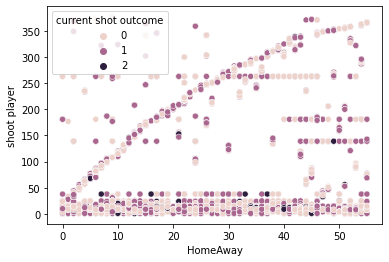

In [57]:
sns.scatterplot(x=df['HomeAway'], y=df['shoot player'], hue=df['current shot outcome']) 

Sonuç: Grafikte de görüldüğü üzere lineer bir artış sözkonusu bu da pozitif korelasyon anlamına gelmektedir. Yani her iki feature da "current shot outcome" tahmin değerini olumu şekilde etikler  

Not:
- Pozitif korelasyona sahip iki değişkenin değerleri birlikte artıp veya birlikte azalacağı için doğrusal bir ilişki gösterir

<AxesSubplot:xlabel='quarter', ylabel='shoot player'>

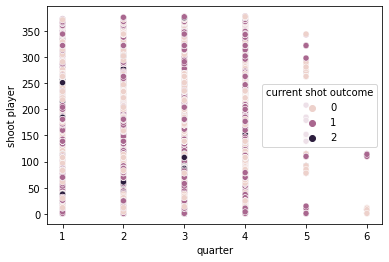

In [58]:
sns.scatterplot(x=df['quarter'], y=df['shoot player'], hue=df['current shot outcome']) 

Sonuç: 'quarter' ve 'shoot player' değişkenleri 'current shot outcome'açsınıda herhangi bir bağınıtı/ilinit bulunamadı

<AxesSubplot:xlabel='date', ylabel='shoot player'>

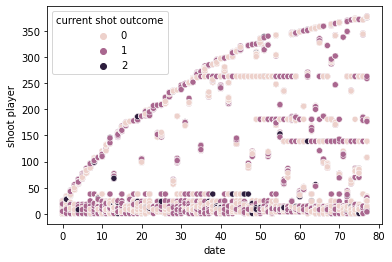

In [59]:
sns.scatterplot(x=df['date'], y=df['shoot player'], hue=df['current shot outcome']) 

Sonuç:Lİneer bir grafik, pozitif korelasyon anlamına gelmektedir. Yani her iki feature da "current shot outcome" tahmin değerini olumu şekilde etikler  

<AxesSubplot:xlabel='date', ylabel='away team'>

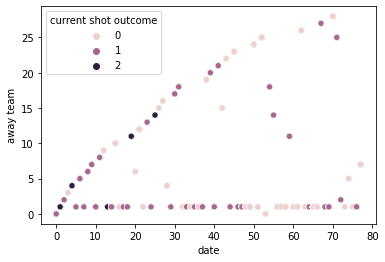

In [61]:
sns.scatterplot(x=df['date'], y=df['away team'], hue=df['current shot outcome'])

Sonuç:Lİneer bir grafik, pozitif korelasyon anlamına gelmektedir. Yani her iki feature da "current shot outcome" tahmin değerini olumu şekilde etikler  

date sütunu ile time from last shot değişkenlerini(featuer/öznitelik) göz öndünde bulundurarak current shot outcome'i nasıl etkilediklediklerini görmek istiyorum


<AxesSubplot:xlabel='date', ylabel='time from last shot'>

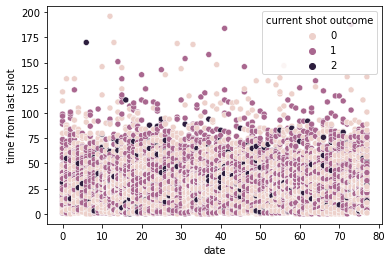

In [62]:
sns.scatterplot(x=df['date'], y=df['time from last shot'], hue=df['current shot outcome'])

Sonuç: Korelasyon yoktur. herhangi bir korelasyon(ilinti/bağıntı) olmadığı çıkarımını yapabiliriz bu 2 feauter arasında

# 23) Datamızı derste ayırdığımız gibi, train validasyon olarak ikiye ayıralım. İlintili feature seçimlerimizi de yapalım. 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv("train.csv")
dataset.head(2)

,Unnamed: 0,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,...,time,date,shoot player,time from last shot,quarter,current shot outcome,My_Team,HomeAway,points_gained,difference
0,0,NaN,PG,No,881.0,NaN,CLE,Driving Layup,2,NYK,...,0:20,2016-10-25,Derrick Rose,NaN,1,SCORED,OPP,CLE_NYK,2.0,0.0
1,1,NaN,PF,Yes,87.0,SCORED,CLE,Hook Shot,2,NYK,...,0:34,2016-10-25,Kevin Love,NaN,1,MISSED,CLE,CLE_NYK,0.0,-2.0


- İlintili feature seçimler için derste gördüğümüz mutual information kullanıyorum

In [113]:
df = dataset.fillna(0)
df = df.copy()

#verilerimizi kategorik formattında numeric değerler dönüştürüyoruz
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
    
y = df.pop("current shot outcome")  #22.sorudan yola çıkarak hedef değişken seçildi   

discrete_features = df.dtypes == int

- MI ile en çok ilintili feauterlar listeleniyor

In [114]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(df, y, discrete_features):
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df, y, discrete_features)
mi_scores[::3]  

points_gained      0.697834
location y         0.058166
player position    0.011228
away team          0.006164
My_Team            0.000702
home team          0.000000
home game          0.000000
Name: MI Scores, dtype: float64

- Modelleri eğitimek ve test etmek için mi_score değerine bağlı olarak ilk 5 değişkeni feauter olarak kullanacağım
- #kullanacağımız verisetinde bazı kategorik veriler mevcut, onları numeric değerlere dönüştürdüm en başta

In [80]:

for colname in dataset.select_dtypes("object"):
    dataset[colname], _ = dataset[colname].factorize()

In [115]:
#sınıflandırcağımı değişkeni/sütunu seçtim
#y; bağımlı değişken oluyor
y =list(dataset.loc[:, "current shot outcome"]) 

#hangi featurelara bağlı olacağını MI ile belirlemiştim ona göre feature listesi oluşturdum
feature_names = ["points_gained","location y","player position","My_Team","away team"]
X = dataset[feature_names].fillna(0) #eğer içerisnde NaN değerleri var ise onuları 0 olacak şekilde değiştirdim

#train-validasyon ayırımı #%25 test için, %75 ise train için ayırdık
train_x, val_x, train_y, val_y = train_test_split(X,y,test_size = 0.25, random_state = 1)


# 24) DecisionTree ile sonuçlar elde edin ve Mean absolute value'nüzü bulun.

In [116]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y) 
pred = dtc.predict(val_x) # tahmin 
accuracy = accuracy_score(val_y, pred )
print("Decision Tree Classifier Accuracy: {} ".format(accuracy*100))


Decision Tree Classifier Accuracy: 92.35537190082644 


In [117]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(val_y, pred)
print("Decision Tree Classifier Mean Absolute Error: {}".format(mae))

Decision Tree Classifier Mean Absolute Error: 0.07644628099173553


# 25) DecisionTree'nizde maksimum yaprak nodlarını(maximum_leaf_nodes) tanımlayarak, modelinizin en iyi sonuç verdiği max_leaf_nodes'i seçin. Sonrasında ona göre bir mean absolute error value'sünü bulun. Bunu neden yaptığımızı detaylı bir şekilde açıklayın.

In [118]:
#farklı  max_leaf_nodes değerleri denemek için liste oluşturdu, bu değerlere göre sonuçlar yorumlanacak
max_leaf_nodes = [5,10,100,500,1000,8900,78900]

for i in range(len(max_leaf_nodes)):
    dtc = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes[i], random_state=0)
    dtc.fit(train_x, train_y) 
    pred = dtc.predict(val_x) # tahmin 
    accuracy = accuracy_score(val_y, pred )
    print("max_leaf_nodes: {}".format(max_leaf_nodes[i]))
    print("Accuracy: {}".format(accuracy*100))

    mae = mean_absolute_error(val_y, pred)
    print("Mean Absolute Error: {}\n".format(mae))

max_leaf_nodes: 5
Accuracy: 95.07083825265643
Mean Absolute Error: 0.049291617473435655

max_leaf_nodes: 10
Accuracy: 95.07083825265643
Mean Absolute Error: 0.049291617473435655

max_leaf_nodes: 100
Accuracy: 94.12632821723732
Mean Absolute Error: 0.05873671782762692

max_leaf_nodes: 500
Accuracy: 92.76859504132231
Mean Absolute Error: 0.07231404958677685

max_leaf_nodes: 1000
Accuracy: 92.38488783943329
Mean Absolute Error: 0.07615112160566706

max_leaf_nodes: 8900
Accuracy: 92.38488783943329
Mean Absolute Error: 0.07615112160566706

max_leaf_nodes: 78900
Accuracy: 92.38488783943329
Mean Absolute Error: 0.07615112160566706



NOT:
- En iyi sonucu veren max_leaf_nodes= 5 iken elde etmiş olduk. Accuracy: 95.07, mae = 0.049
- Sonuç: max_leaf_nodes değerinin çok büyük seçtiğimiz zaman herhangi bir öğrenme belli bir eşikten sonra duruyor(Sönümleniyor). Yukarıdaki örenkte de görüldüğü üzere son 3 deneme aynı accuracy değerini elde etmiş oluyoruz buna da overfitting yani aşırı öğrenne denir. bu gibi durumlara çözüm olarak Random Forest alforitması ortaya atılmıştır

# 26) Random Forest'ta max_leaf_nodes kullanılır mı? Bu soruyu cevaplarken koddan yardım alıp göstermeyi unutmayın.

In [119]:
#Evet kullanılır çünkü random forest aslında decsion tree'den türetilmiştir

from sklearn.ensemble import RandomForestClassifier
dtc =  RandomForestClassifier(max_leaf_nodes=100, random_state=0)

#27.soru random foresti desision tree de olduğu gibi max_leaf_nodes parameteresini kullanımı gösterilmiştir

# 27) 24. Ve 25. Soruda yaptığımız işlemin aynısını random Forest modeli için de yapın.

- 24 gibi olan kısım

In [120]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_x, train_y) 
pred = rfc.predict(val_x) 
accuracy = accuracy_score(val_y, pred)
print("Random Forest Classifier Accuracy: {} ".format(accuracy*100))

mae = mean_absolute_error(val_y, pred)
print("Random Forest Classifier Mean Absolute Error: {}\n".format(mae))

Random Forest Classifier Accuracy: 93.83116883116884 
Random Forest Classifier Mean Absolute Error: 0.06168831168831169



- 25 gibi olan kısım

In [121]:
max_leaf_nodes = [5,10,100,500,1000,8900,78900]

for i in range(len(max_leaf_nodes)):
    rfc = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes[i], random_state=1)
    rfc.fit(train_x, train_y) 
    pred = rfc.predict(val_x) 
    accuracy = accuracy_score(val_y, pred )
    print("max_leaf_nodes: {}".format(max_leaf_nodes[i]))
    print("Accuracy: {}".format(accuracy*100))

    mae = mean_absolute_error(val_y, pred)
    print("Mean absolute error: {}\n".format(mae))

max_leaf_nodes: 5
Accuracy: 95.07083825265643
Mean absolute error: 0.049291617473435655

max_leaf_nodes: 10
Accuracy: 95.07083825265643
Mean absolute error: 0.049291617473435655

max_leaf_nodes: 100
Accuracy: 95.07083825265643
Mean absolute error: 0.049291617473435655

max_leaf_nodes: 500
Accuracy: 94.2443919716647
Mean absolute error: 0.05755608028335301

max_leaf_nodes: 1000
Accuracy: 94.00826446280992
Mean absolute error: 0.05991735537190083

max_leaf_nodes: 8900
Accuracy: 94.00826446280992
Mean absolute error: 0.05991735537190083

max_leaf_nodes: 78900
Accuracy: 94.00826446280992
Mean absolute error: 0.05991735537190083



# 28) Random forest ve decision tree'nin avantajlarını ve dezavantajlarını yorumlayınız

Decision Tree'nin Avantajları:
- Basit yapısında dolayı hem anlaması hemde yorumlaması kolaydir.
- Hem nümerik hem de kategorik verilerin eğitimini gerçekleştirebilir.

Decision Tree'nin Dezavantajları:
- Veriyi iyi bir şekilde açıklamayan aşırı karmaşık ağaçlar oluşturabilir. Bu durumda ağaç yapısını anlamamız zor olur.
- Çok fazla değişken olduğu durumlarda aşırı öğrenme problemi yaşayabiliriz. 
- Tek bir karar ağacı bazı problemler için yetersiz kalır bu gibi durumları iyilştirmek için Random Forest geliştirilmiştir. 

Random Forest'in Avantajları :

- Random Forest, Ensemble algoritmasıdır. Verilerin alt kümesinde olabildiğince çok ağaç oluşturur ve tüm ağaçların çıktısını birleştirir. Bu şekilde karar ağaçlarında overfitting(Aşırı Öğrenme) durumunu azaltır ve dolayısıyla modelin Accuracy(doğruluğu) değeri artar.
- Hem kategorik hemde nümerik değerler kabul ettiği içinhem sınıflandırma hem de regresyon problemlerini çözmek için kullanılabilir .
- Kullandığımız Bağımlı ve bağımsız(Feature) değişkenleri normalize(Ölçeklendirme) etmemize gerek yoktur. 

Random Forest'in Dezavantajları:
- Random forest decision tree’ye göre çok daha Karmaşık bir yapıya sahiptir nedeni ise bazı problemlerde durumlarda çok fazla sayıda ağaç oluşturmaya ihtiyaç duyabilir.
- Daha fazla işlem yükü(çok sayıda karar ağaçları içerdiği için) dolaysıyla eğitim süreleri uzun sürmektedir.
